In [2]:
# importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

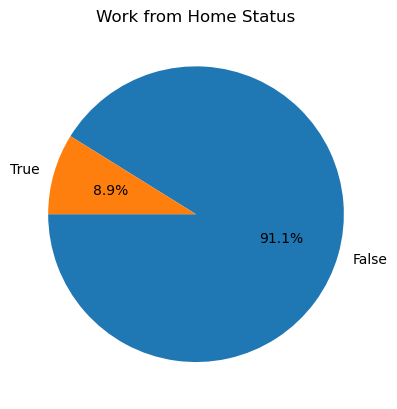

In [11]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=180, autopct = '%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel("")
plt.show()

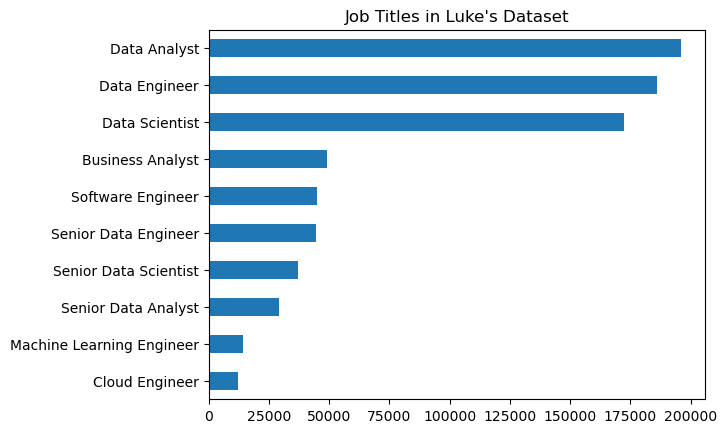

In [5]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title("Job Titles in Luke's Dataset")
plt.gca().invert_yaxis()
plt.ylabel("")
plt.show()

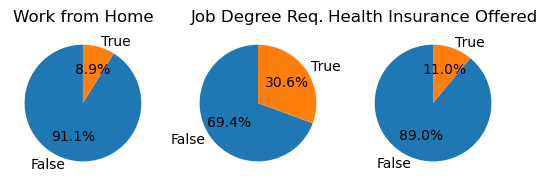

In [19]:
fix, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()